In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np
import datetime
from datetime import date, timedelta

In [2]:
url_cases = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv'

shortstate = {
'Johor': 'JHR',
'Kedah': 'KDH',
'Kelantan': 'KTN',
'Melaka': 'MLK',
'Negeri Sembilan': 'NSN',
'Pahang': 'PHG',
'Perak': 'PRK',
'Perlis': 'PLS',
'Pulau Pinang': 'PNG',
'Sabah': 'SBH',
'Sarawak': 'SWK',
'Selangor': 'SEL',
'Terengganu': 'TRG',
'Sel & WP': 'GKV',
'W.P. Kuala Lumpur': 'WPKL',
'W.P. Labuan': 'LBN',
'W.P. Putrajaya': 'WPP'
}

mergeKV = {'Selangor': 'Sel & WP', 'W.P. Kuala Lumpur': 'Sel & WP', 'W.P. Putrajaya': 'Sel & WP'}

def dfIsComplete(df):
    odf = df.copy()
    dff = df.groupby(['date', 'state']) \
        .sum() \
        .unstack(fill_value=0) \
        .asfreq('D', fill_value=0) \
        .stack() \
        .sort_index(level=1) \
        .reset_index() \
        .sort_values(by=['date', 'state'])
    dff.date = dff.date.dt.date

    assert len(odf) == len(dff)

In [3]:
df = pd.read_csv(url_cases, usecols=['date','state','cases_new'], parse_dates=['date'])
# df.state = df.state.replace(mergeKV)
df = df.groupby(['date','state']).sum().reset_index()
df = df[df.date.dt.date >= date(2021,4,19)] # start of Phase 2 vax
dfIsComplete(df)

df.head()

,date,state,cases_new
7200,2021-04-19,Johor,115
7201,2021-04-19,Kedah,48
7202,2021-04-19,Kelantan,290
7203,2021-04-19,Melaka,27
7204,2021-04-19,Negeri Sembilan,91


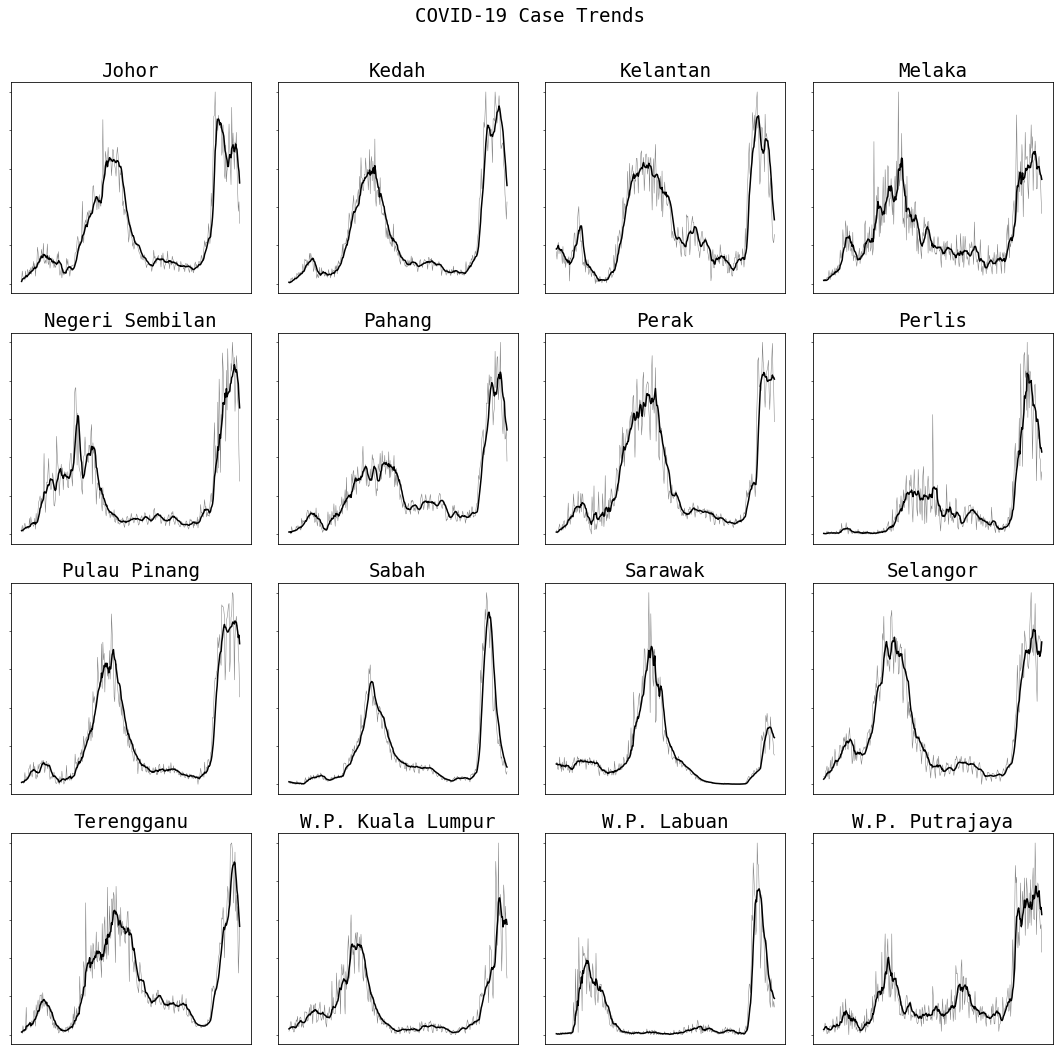

In [4]:
states = list(df.state.unique())

plt.rcParams["font.family"] = "monospace"
plt.rcParams.update({'font.size': 16})
figure, axes = plt.subplots(4,4, figsize=(30,30),sharey=True)
figure.set_size_inches([15,15],forward=True)
figure.suptitle('COVID-19 Case Trends')
axe = axes.ravel()

i = 0
for s in states:
    temp = df.copy()
    temp = temp[temp.state == s]
    temp.cases_new = (temp.cases_new - temp.cases_new.min()) / (temp.cases_new.max() - temp.cases_new.min()) * 100
    temp['cases_new_ma'] = temp['cases_new'].rolling(window=7).mean()
    temp = temp.dropna(how='any')

    temp['cases_new'].plot(ax=axe[i], legend=None, color='black', linewidth =0.5, alpha = 0.5)
    temp['cases_new_ma'].plot(ax=axe[i], legend=None, color='black')
    
    axe[i].set_title(s)
    i += 1

plt.setp(axes, xticks=[], yticks=[])
# axes.flat[-1].set_visible(False)
figure.tight_layout()
figure.subplots_adjust(top=0.91)

#plt.savefig('charts/charts_0_casetrends.png',pad_inches = 0)
plt.show()